<a href="https://colab.research.google.com/github/rsha0812/EVA4-S12/blob/master/EVA4_S12_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import math
from DataAlb import *
from ImgnetDataSet import *
from model import *
from lr_finder import *
from TinyImgNet import *
import torch.nn as nn
import torch.nn.functional as F
from trainingfile import *

# Data Loader

In [4]:
trainloader, testloader = getData()

 Already downloaded
Starting data loading
Finished data loading, in 0.1054840087890625 seconds


# Device

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

cuda


# Model Summary


In [6]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

# LR Finder



Learning rate search finished. See the graph with {finder_name}.plot()


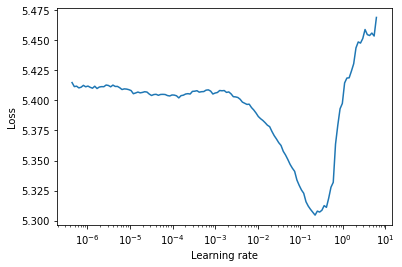

In [7]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=150)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# Execution


In [8]:
Training(50, model, device, trainloader, testloader, 0.1)

  0%|          | 0/154 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.574360370635986 Batch_id=153 Accuracy=4.14: 100%|██████████| 154/154 [02:13<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -1.8022, Accuracy: 2174/33000 (6.59%)

EPOCH: 1


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -3.0431, Accuracy: 4212/33000 (12.76%)

EPOCH: 2


Loss=3.4465627670288086 Batch_id=153 Accuracy=15.76: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -3.9341, Accuracy: 5594/33000 (16.95%)

EPOCH: 3


Loss=3.187756299972534 Batch_id=153 Accuracy=21.76: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -4.8425, Accuracy: 7993/33000 (24.22%)

EPOCH: 4


Loss=2.920250415802002 Batch_id=153 Accuracy=26.94: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -5.3994, Accuracy: 8945/33000 (27.11%)

EPOCH: 5


Loss=2.7499520778656006 Batch_id=153 Accuracy=31.81: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.1020, Accuracy: 9966/33000 (30.20%)

EPOCH: 6


Loss=2.5606813430786133 Batch_id=153 Accuracy=38.17: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.8949, Accuracy: 11482/33000 (34.79%)

EPOCH: 7


Loss=2.626558303833008 Batch_id=153 Accuracy=43.52: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -7.5737, Accuracy: 13425/33000 (40.68%)

EPOCH: 8


Loss=2.1289234161376953 Batch_id=153 Accuracy=48.41: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -7.8443, Accuracy: 14459/33000 (43.82%)

EPOCH: 9


Loss=2.072683334350586 Batch_id=153 Accuracy=52.78: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.7202, Accuracy: 15331/33000 (46.46%)

EPOCH: 10


Loss=1.6568307876586914 Batch_id=153 Accuracy=57.39: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.0783, Accuracy: 16367/33000 (49.60%)

EPOCH: 11


Loss=1.755325436592102 Batch_id=153 Accuracy=56.03: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.8328, Accuracy: 15766/33000 (47.78%)

EPOCH: 12


Loss=1.8433500528335571 Batch_id=153 Accuracy=54.10: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.7282, Accuracy: 14677/33000 (44.48%)

EPOCH: 13


Loss=2.0090584754943848 Batch_id=153 Accuracy=53.30: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.2437, Accuracy: 14114/33000 (42.77%)

EPOCH: 14


Loss=1.7262414693832397 Batch_id=153 Accuracy=53.06: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.9768, Accuracy: 13961/33000 (42.31%)

EPOCH: 15


Loss=1.8442790508270264 Batch_id=153 Accuracy=54.40: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.2795, Accuracy: 14501/33000 (43.94%)

EPOCH: 16


Loss=1.6014164686203003 Batch_id=153 Accuracy=59.35: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -10.1449, Accuracy: 15441/33000 (46.79%)

EPOCH: 17


Loss=1.3680436611175537 Batch_id=153 Accuracy=65.14: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -10.8281, Accuracy: 16229/33000 (49.18%)

EPOCH: 18


Loss=1.1714507341384888 Batch_id=153 Accuracy=70.41: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.2503, Accuracy: 17112/33000 (51.85%)

EPOCH: 19


Loss=0.8144192099571228 Batch_id=153 Accuracy=75.85: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.8259, Accuracy: 17900/33000 (54.24%)

EPOCH: 20


Loss=0.7290281653404236 Batch_id=153 Accuracy=80.72: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.9512, Accuracy: 18487/33000 (56.02%)

EPOCH: 21


Loss=0.797950804233551 Batch_id=153 Accuracy=79.35: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.3109, Accuracy: 17644/33000 (53.47%)

EPOCH: 22


Loss=0.9617605805397034 Batch_id=153 Accuracy=76.33: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.2497, Accuracy: 16586/33000 (50.26%)

EPOCH: 23


Loss=1.0905042886734009 Batch_id=153 Accuracy=71.55: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.9913, Accuracy: 16003/33000 (48.49%)

EPOCH: 24


Loss=1.2408854961395264 Batch_id=153 Accuracy=69.14: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.3560, Accuracy: 15336/33000 (46.47%)

EPOCH: 25


Loss=1.304883599281311 Batch_id=153 Accuracy=67.69: 100%|██████████| 154/154 [02:14<00:00,  1.14it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.0272, Accuracy: 15616/33000 (47.32%)

EPOCH: 26


Loss=0.9768381714820862 Batch_id=153 Accuracy=74.06: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.4432, Accuracy: 16185/33000 (49.05%)

EPOCH: 27


Loss=0.6603695154190063 Batch_id=153 Accuracy=80.89: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.2703, Accuracy: 17114/33000 (51.86%)

EPOCH: 28


Loss=0.49023187160491943 Batch_id=153 Accuracy=86.84: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.8513, Accuracy: 17683/33000 (53.58%)

EPOCH: 29


Loss=0.33999958634376526 Batch_id=153 Accuracy=90.69: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.6679, Accuracy: 18115/33000 (54.89%)

EPOCH: 30


Loss=0.2699723243713379 Batch_id=153 Accuracy=93.36: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.6604, Accuracy: 18434/33000 (55.86%)

EPOCH: 31


Loss=0.3696545362472534 Batch_id=153 Accuracy=92.82: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.8166, Accuracy: 18063/33000 (54.74%)

EPOCH: 32


Loss=0.3821578621864319 Batch_id=153 Accuracy=91.20: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.7836, Accuracy: 17483/33000 (52.98%)

EPOCH: 33


Loss=0.539169430732727 Batch_id=153 Accuracy=87.34: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.2444, Accuracy: 16468/33000 (49.90%)

EPOCH: 34


Loss=0.8083571195602417 Batch_id=153 Accuracy=81.48: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.3714, Accuracy: 15179/33000 (46.00%)

EPOCH: 35


Loss=0.9812883734703064 Batch_id=153 Accuracy=76.50: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.4266, Accuracy: 15261/33000 (46.25%)

EPOCH: 36


Loss=0.583206832408905 Batch_id=153 Accuracy=83.14: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.6832, Accuracy: 16624/33000 (50.38%)

EPOCH: 37


Loss=0.34283557534217834 Batch_id=153 Accuracy=89.34: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.0104, Accuracy: 17196/33000 (52.11%)

EPOCH: 38


Loss=0.22523003816604614 Batch_id=153 Accuracy=93.09: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.0831, Accuracy: 17843/33000 (54.07%)

EPOCH: 39


Loss=0.14980508387088776 Batch_id=153 Accuracy=95.61: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.4632, Accuracy: 18231/33000 (55.25%)

EPOCH: 40


Loss=0.13406701385974884 Batch_id=153 Accuracy=96.69: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.5128, Accuracy: 18428/33000 (55.84%)

EPOCH: 41


Loss=0.12031188607215881 Batch_id=153 Accuracy=96.60: 100%|██████████| 154/154 [02:14<00:00,  1.14it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.5669, Accuracy: 18157/33000 (55.02%)

EPOCH: 42


Loss=0.16534872353076935 Batch_id=153 Accuracy=96.00: 100%|██████████| 154/154 [02:14<00:00,  1.14it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.5296, Accuracy: 17670/33000 (53.55%)

EPOCH: 43


Loss=0.24247826635837555 Batch_id=153 Accuracy=94.32: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -17.2836, Accuracy: 17351/33000 (52.58%)

EPOCH: 44


Loss=0.3894626498222351 Batch_id=153 Accuracy=91.01: 100%|██████████| 154/154 [02:14<00:00,  1.14it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.6216, Accuracy: 16342/33000 (49.52%)

EPOCH: 45


Loss=0.6846622824668884 Batch_id=153 Accuracy=84.66: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.6764, Accuracy: 15107/33000 (45.78%)

EPOCH: 46


Loss=0.38247010111808777 Batch_id=153 Accuracy=87.62: 100%|██████████| 154/154 [02:14<00:00,  1.14it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.2123, Accuracy: 16610/33000 (50.33%)

EPOCH: 47


Loss=0.2368762046098709 Batch_id=153 Accuracy=92.78: 100%|██████████| 154/154 [02:14<00:00,  1.14it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -17.3132, Accuracy: 17366/33000 (52.62%)

EPOCH: 48


Loss=0.18675261735916138 Batch_id=153 Accuracy=95.70: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -17.5271, Accuracy: 17824/33000 (54.01%)

EPOCH: 49


Loss=0.10972470045089722 Batch_id=153 Accuracy=97.15: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]



Test set: Average loss: -17.6964, Accuracy: 18100/33000 (54.85%)



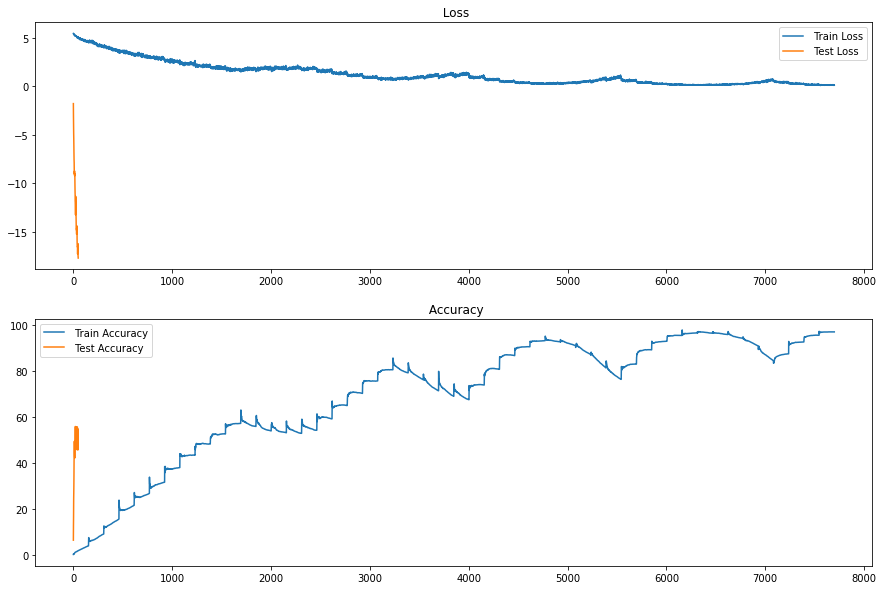

In [9]:
plotPerformanceGraph( )